In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [120]:
df=pd.read_csv('/content/restaurant_data.csv')

In [121]:
df.drop(['Name'],axis=1,inplace=True)

In [122]:
df.head(5)

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   object 
 1   Cuisine                 8368 non-null   object 
 2   Rating                  8368 non-null   float64
 3   Seating Capacity        8368 non-null   int64  
 4   Average Meal Price      8368 non-null   float64
 5   Marketing Budget        8368 non-null   int64  
 6   Social Media Followers  8368 non-null   int64  
 7   Chef Experience Years   8368 non-null   int64  
 8   Number of Reviews       8368 non-null   int64  
 9   Avg Review Length       8368 non-null   float64
 10  Ambience Score          8368 non-null   float64
 11  Service Quality Score   8368 non-null   float64
 12  Parking Availability    8368 non-null   object 
 13  Weekend Reservations    8368 non-null   int64  
 14  Weekday Reservations    8368 non-null   

In [124]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [125]:
# Print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Location': ['Rural' 'Downtown' 'Suburban']

Unique values in column 'Cuisine': ['Japanese' 'Mexican' 'Italian' 'Indian' 'French' 'American']

Unique values in column 'Rating': [4.  3.2 4.7 4.4 4.9 4.1 4.2 5.  4.3 3.1 4.8 4.6 3.6 3.3 3.4 3.5 3.7 3.8
 4.5 3.  3.9]

Unique values in column 'Seating Capacity': [38 76 48 34 88 79 49 61 37 32 40 77 42 59 87 56 60 72 53 57 75 82 41 35
 68 64 31 46 45 74 71 84 33 51 54 67 70 89 55 83 39 47 58 81 63 80 69 78
 43 85 50 90 52 44 36 30 65 86 73 62 66]

Unique values in column 'Average Meal Price': [73.98 28.11 48.29 ... 72.06 53.63 71.07]

Unique values in column 'Marketing Budget': [2224 4416 2796 ... 5150  915 5949]

Unique values in column 'Social Media Followers': [23406 42741 37285 ... 63945  7170 24268]

Unique values in column 'Chef Experience Years': [13  8 18  9  5 11 14 16  4 19  2 17  6 15  1  3  7 10 12]

Unique values in column 'Number of Reviews': [185 533 853  82  78 400 106 377 494 907 520 419 741 420 988 6

In [126]:
df.isna().sum()

Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [127]:
df.shape

(8368, 16)

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
print("Summary statistics for 'Marketing Budget':")
print(df['Marketing Budget'].describe())

Summary statistics for 'Marketing Budget':
count    8368.000000
mean     3218.254900
std      1824.896053
min       604.000000
25%      1889.000000
50%      2846.500000
75%      4008.500000
max      9978.000000
Name: Marketing Budget, dtype: float64


In [130]:
df['Marketing Budget in Rupees'] = df['Marketing Budget'] * 80
df.drop(['Marketing Budget'],axis=1,inplace=True)

In [131]:
df['Avg Review Length'] = pd.to_numeric(df['Avg Review Length'], errors='coerce')

In [132]:
df['Avg Review Length'] = pd.to_numeric(df['Avg Review Length'], errors='coerce')
df['Avg Review Length'] = df['Avg Review Length'].round().astype(int)
print(df[['Avg Review Length']].dtypes)
print(df[['Avg Review Length']])

Avg Review Length    int64
dtype: object
      Avg Review Length
0                   162
1                   149
2                    57
3                   205
4                   242
...                 ...
8363                254
8364                176
8365                223
8366                178
8367                152

[8368 rows x 1 columns]


In [133]:
df['Average Meal Price in Rupees'] = df['Average Meal Price'] * 80
df.drop(['Average Meal Price'],axis=1,inplace=True)

In [134]:
# Print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Location': ['Rural' 'Downtown' 'Suburban']

Unique values in column 'Cuisine': ['Japanese' 'Mexican' 'Italian' 'Indian' 'French' 'American']

Unique values in column 'Rating': [4.  3.2 4.7 4.4 4.9 4.1 4.2 5.  4.3 3.1 4.8 4.6 3.6 3.3 3.4 3.5 3.7 3.8
 4.5 3.  3.9]

Unique values in column 'Seating Capacity': [38 76 48 34 88 79 49 61 37 32 40 77 42 59 87 56 60 72 53 57 75 82 41 35
 68 64 31 46 45 74 71 84 33 51 54 67 70 89 55 83 39 47 58 81 63 80 69 78
 43 85 50 90 52 44 36 30 65 86 73 62 66]

Unique values in column 'Social Media Followers': [23406 42741 37285 ... 63945  7170 24268]

Unique values in column 'Chef Experience Years': [13  8 18  9  5 11 14 16  4 19  2 17  6 15  1  3  7 10 12]

Unique values in column 'Number of Reviews': [185 533 853  82  78 400 106 377 494 907 520 419 741 420 988 687 685 971
 421 539 302 535 920 307 488 651  67 268 561 227 258 862 576 284 184 260
 716 601 322 209 193 752 557 783 383 551 493 803 922 899 135 229 129 866
 610 203 228 

# **EDA**

In [135]:
# Pie chart of Parking Availability
fig = px.pie(df, names='Parking Availability', title='Parking Availability Distribution')
fig.show()

In [136]:
fig = px.histogram(df, x='Location', title='Count of Restaurants by Location')
fig.show()

In [137]:
fig = px.violin(df, x='Cuisine', y='Rating', title='Violin Plot of Ratings by Cuisine', box=True, points="all")
fig.show()

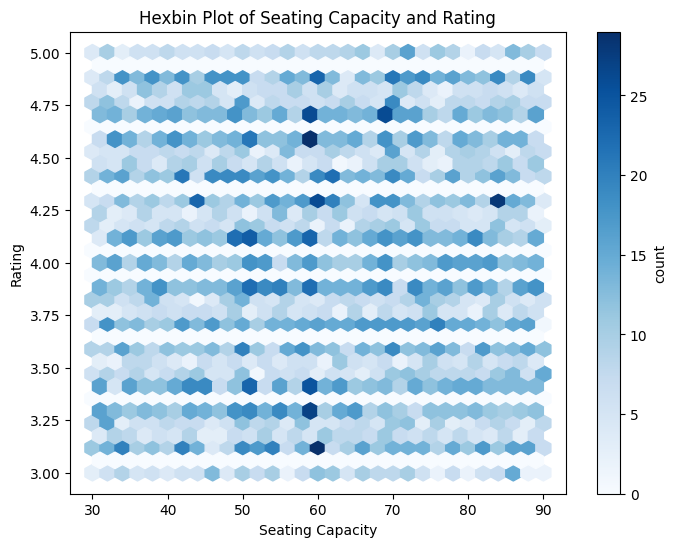

In [138]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Seating Capacity'], df['Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='count')
plt.xlabel('Seating Capacity')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Seating Capacity and Rating')
plt.show()

In [139]:
fig = px.histogram(df, x='Ambience Score', nbins=20, title='Histogram of Ambience Score')
fig.show()

In [140]:
fig = px.histogram(df, x='Service Quality Score', nbins=20, title='Histogram of Service Quality Score')
fig.show()

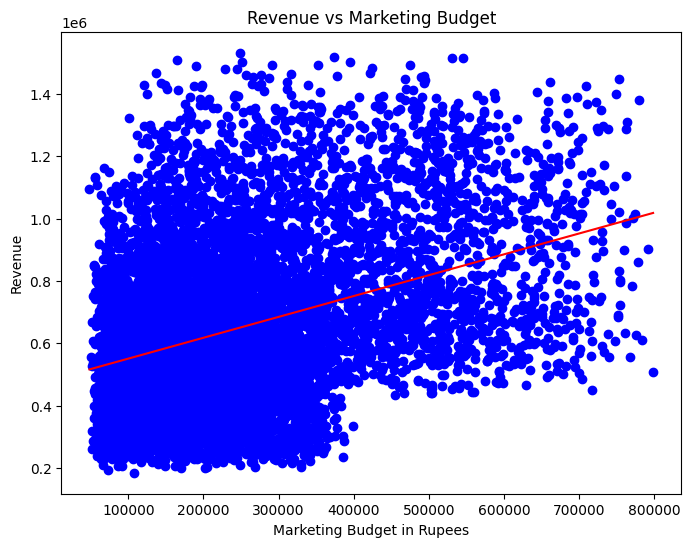

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Marketing Budget in Rupees'], df['Revenue'], color='blue')
plt.plot(np.unique(df['Marketing Budget in Rupees']), np.poly1d(np.polyfit(df['Marketing Budget in Rupees'], df['Revenue'], 1))(np.unique(df['Marketing Budget in Rupees'])), color='red')
plt.xlabel('Marketing Budget in Rupees')
plt.ylabel('Revenue')
plt.title('Revenue vs Marketing Budget')
plt.show()

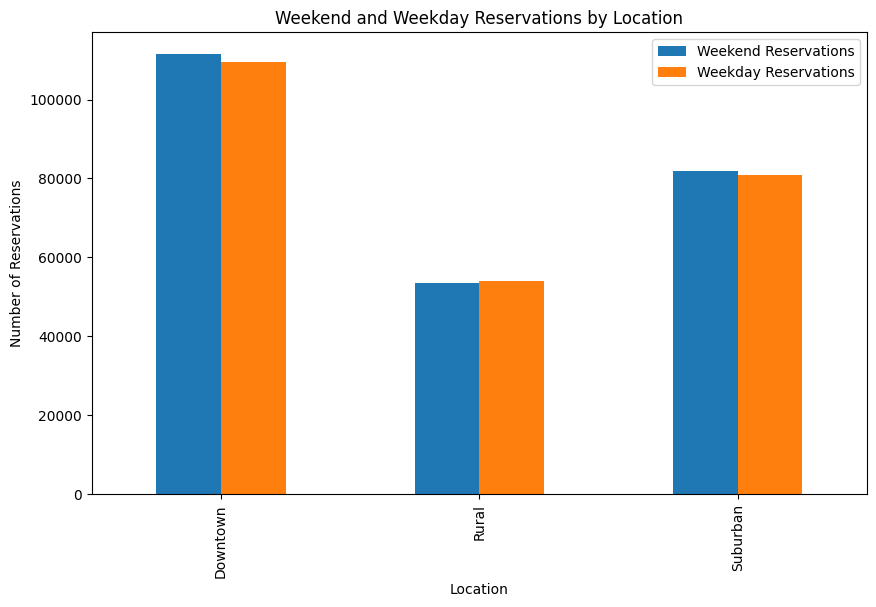

In [142]:
df_grouped = df.groupby('Location').sum()[['Weekend Reservations', 'Weekday Reservations']].reset_index()

df_grouped.plot(kind='bar', x='Location', figsize=(10, 6), stacked=False)
plt.title('Weekend and Weekday Reservations by Location')
plt.xlabel('Location')
plt.ylabel('Number of Reservations')
plt.show()

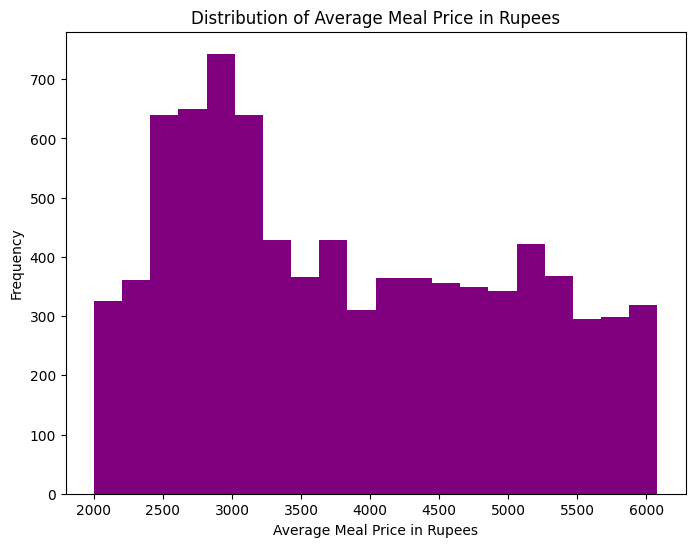

In [143]:
plt.figure(figsize=(8, 6))
plt.hist(df['Average Meal Price in Rupees'], bins=20, color='purple')
plt.xlabel('Average Meal Price in Rupees')
plt.ylabel('Frequency')
plt.title('Distribution of Average Meal Price in Rupees')
plt.show()

In [144]:
df2=df.copy()
# Define color mapping
location_colors = {'Rural': 'red', 'Suburban': 'yellow', 'Downtown': 'green'}
df2['Color'] = df2['Location'].map(location_colors)

# Scatter plot with custom legend
fig = px.scatter(df2, x='Social Media Followers', y='Revenue', color='Location',
                 title='Social Media Followers vs Revenue by Location',
                 color_discrete_map=location_colors)

# Update layout to show custom legend
fig.update_layout(
    legend=dict(
        title="Location",
        itemsizing='constant',
        traceorder='reversed'
    )
)

fig.show()# Define color mapping


In [146]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Location', 'Cuisine', 'Parking Availability'])
# Display the encoded DataFrame
df.head()

,Rating,Seating Capacity,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,4.0,38,23406,13,185,162,1.3,7.0,13,4,...,True,False,False,False,False,False,True,False,False,True
1,3.2,76,42741,8,533,149,2.6,3.4,48,6,...,False,False,False,False,False,False,False,True,False,True
2,4.7,48,37285,18,853,57,5.3,6.7,27,14,...,True,False,False,False,False,True,False,False,True,False
3,4.4,34,15214,13,82,205,4.6,2.8,9,17,...,True,False,False,False,False,True,False,False,False,True
4,4.9,88,40171,9,78,242,8.6,2.1,37,26,...,False,False,False,False,False,False,True,False,True,False


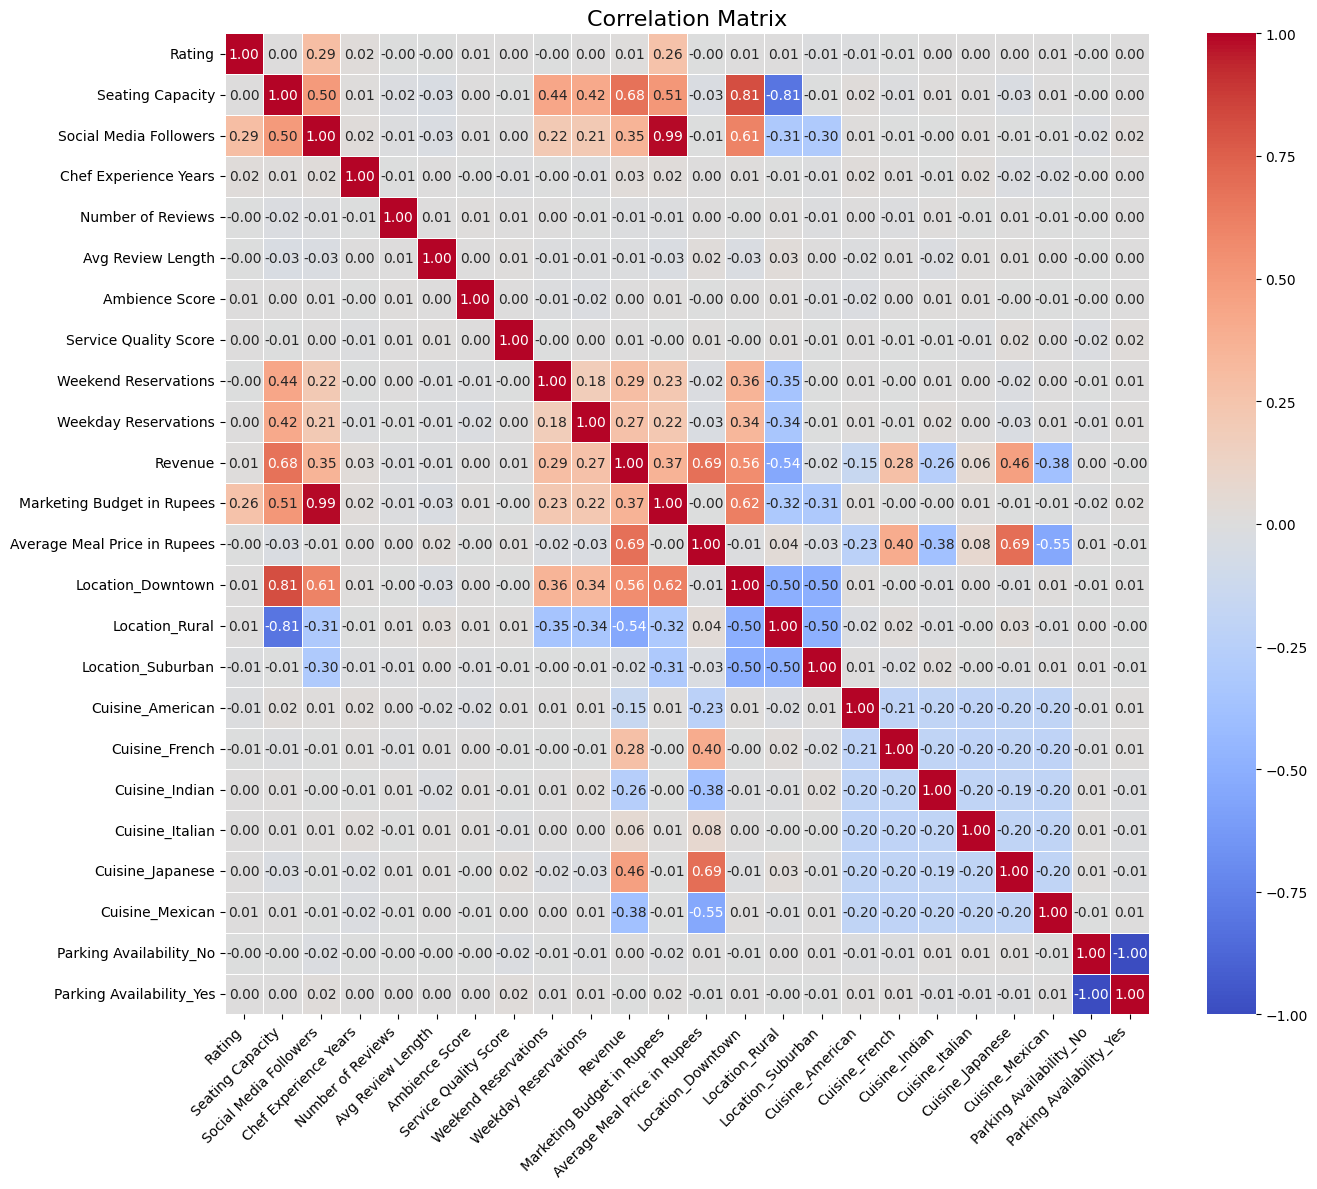

In [147]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))  # Adjust figure size for better spacing
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adjust label rotation and font size
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust spacing
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Automatically adjust subplot parameters to give some padding

plt.show()

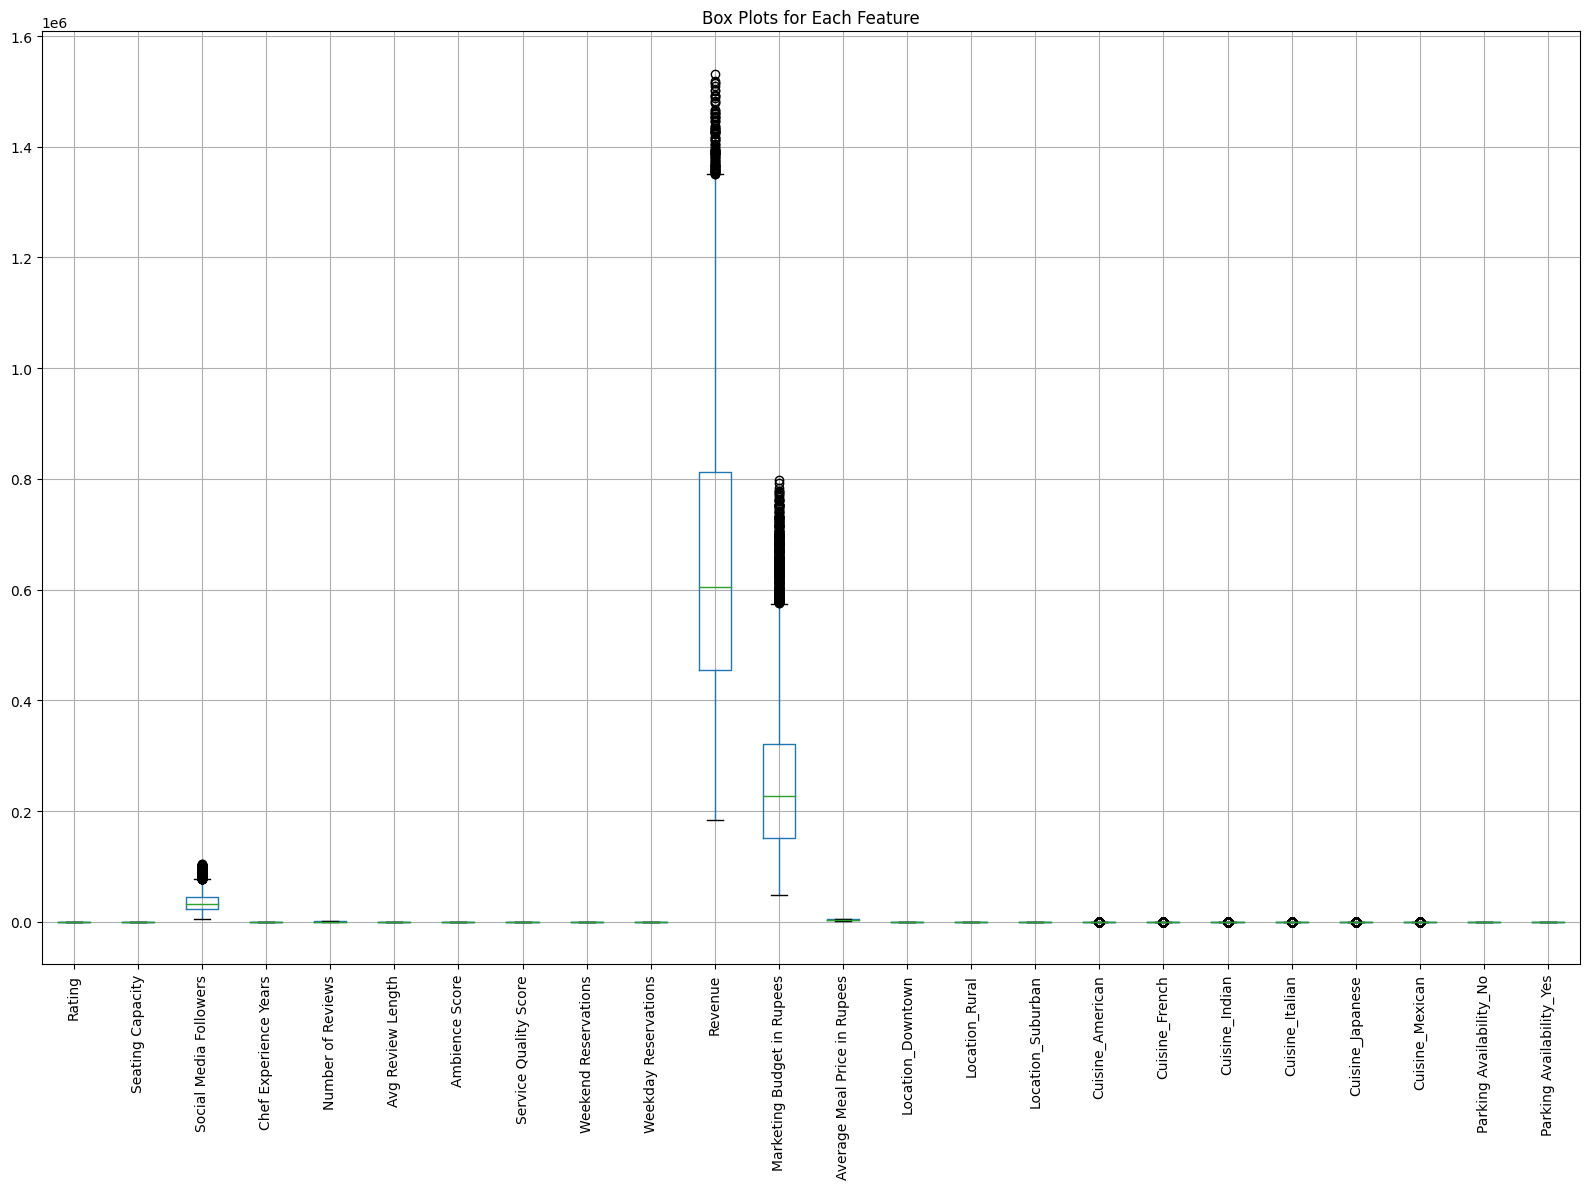

In [148]:
# Plot initial box plots
plt.figure(figsize=(16, 12))
df.boxplot(rot=90)
plt.title('Box Plots for Each Feature')
plt.tight_layout()
plt.show()

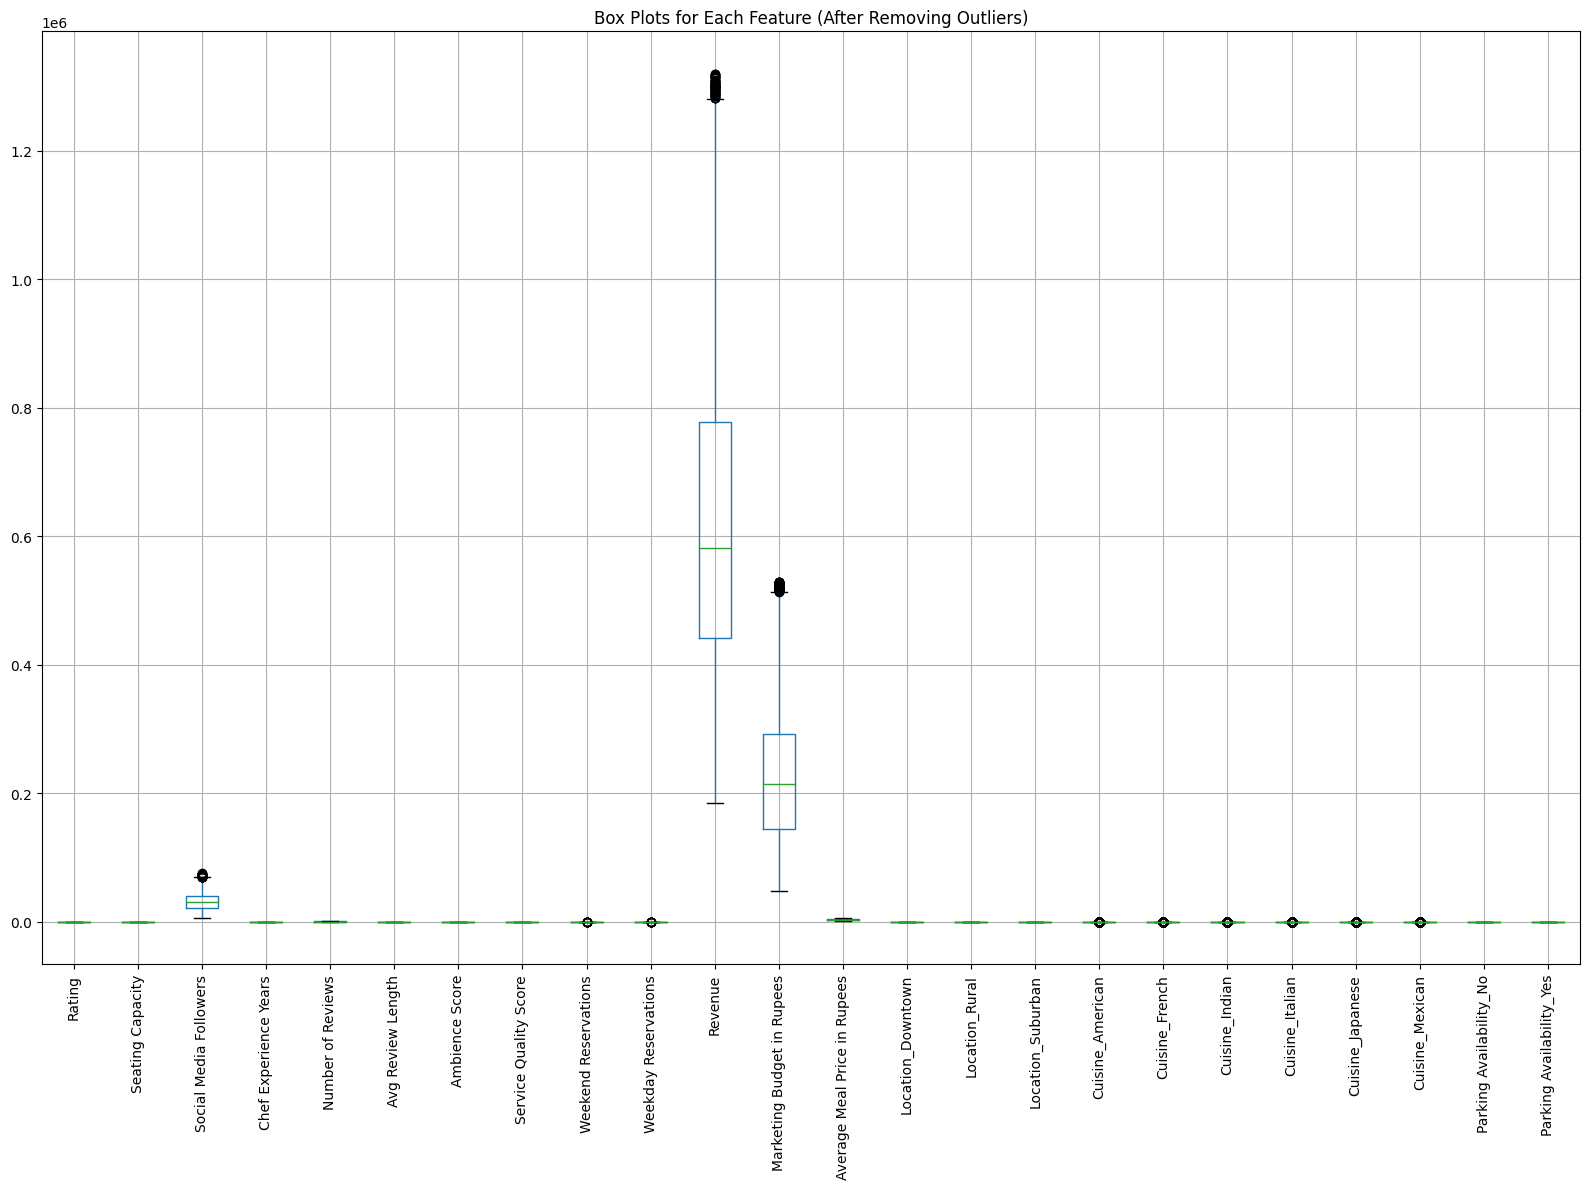

In [149]:
# Function to remove outliers using IQR
def remove_outliers(df):
    df_no_outliers = df.copy()
    for col in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= (Q1 - 1.5 * IQR)) & (df_no_outliers[col] <= (Q3 + 1.5 * IQR))]
    return df_no_outliers

# Remove outliers
df_no_outliers = remove_outliers(df)

# Plot box plots after removing outliers
plt.figure(figsize=(16, 12))
df_no_outliers.boxplot(rot=90)
plt.title('Box Plots for Each Feature (After Removing Outliers)')
plt.tight_layout()
plt.show()

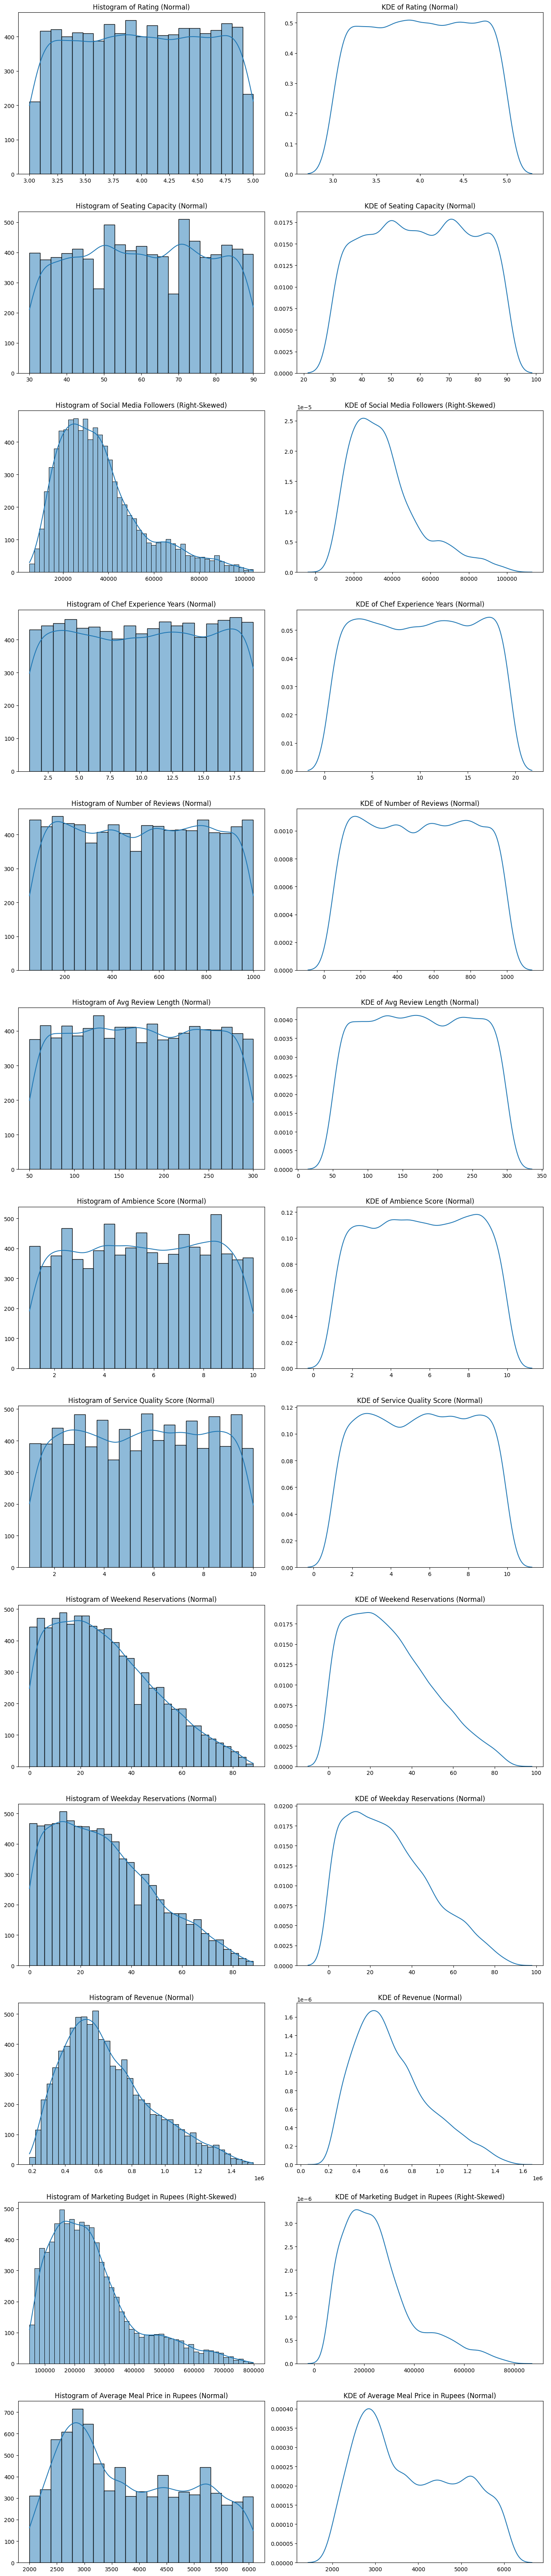

In [150]:
# Calculate skewness for numerical features
skewness = df.select_dtypes(include=['float64', 'int64']).skew()

# Categorize skewness
def categorize_skewness(skew):
    if skew > 1:
        return 'Right-Skewed'
    elif skew < -1:
        return 'Left-Skewed'
    else:
        return 'Normal'

skewness_category = skewness.apply(categorize_skewness)

# Plot distributions
features = skewness.index
n_features = len(features)
fig, axes = plt.subplots(n_features, 2, figsize=(14, 5 * n_features))

for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # Plot KDE
    sns.kdeplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE of {feature}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

    # Set skewness category as title
    axes[i, 0].set_title(f'Histogram of {feature} ({skewness_category[feature]})')
    axes[i, 1].set_title(f'KDE of {feature} ({skewness_category[feature]})')

plt.tight_layout()
plt.show()

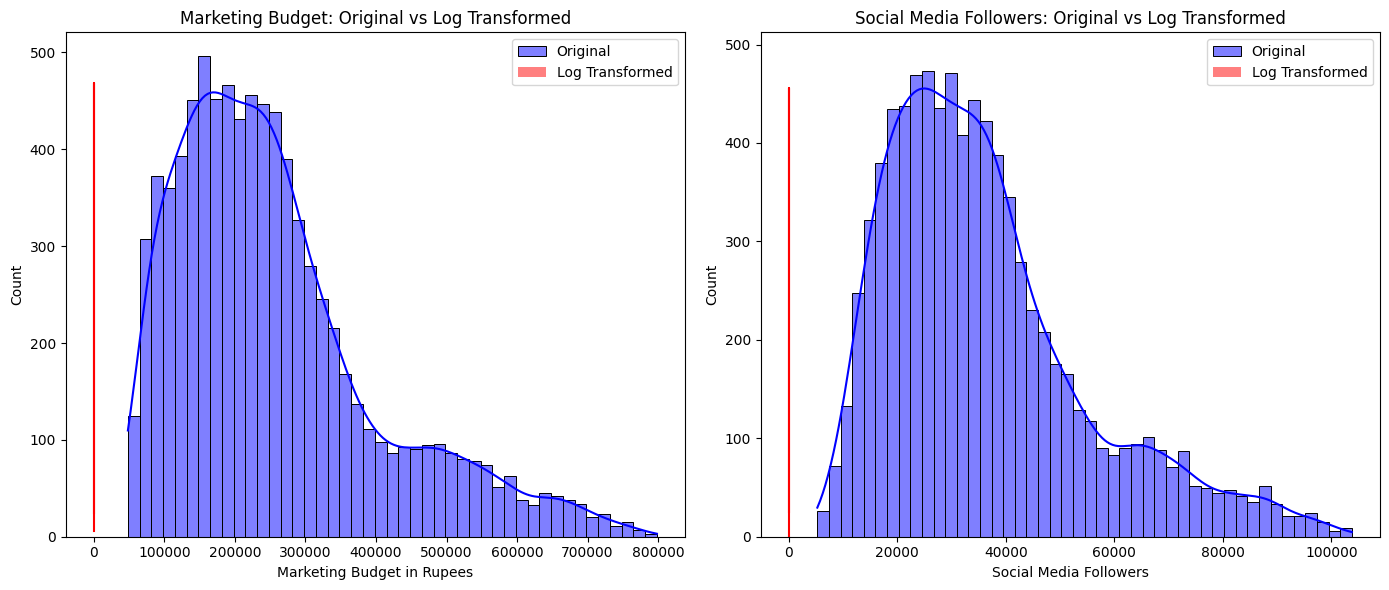

In [151]:
# Apply log transformation
df['Marketing Budget (Log)'] = np.log1p(df['Marketing Budget in Rupees'])
df['Social Media Followers (Log)'] = np.log1p(df['Social Media Followers'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot original vs. log-transformed Marketing Budget
sns.histplot(df['Marketing Budget in Rupees'], kde=True, ax=axes[0], color='blue', label='Original')
sns.histplot(df['Marketing Budget (Log)'], kde=True, ax=axes[0], color='red', label='Log Transformed')
axes[0].set_title('Marketing Budget: Original vs Log Transformed')
axes[0].legend()

# Plot original vs. log-transformed Social Media Followers
sns.histplot(df['Social Media Followers'], kde=True, ax=axes[1], color='blue', label='Original')
sns.histplot(df['Social Media Followers (Log)'], kde=True, ax=axes[1], color='red', label='Log Transformed')
axes[1].set_title('Social Media Followers: Original vs Log Transformed')
axes[1].legend()

plt.tight_layout()
plt.show()


# **LINEAR REGRESSION**

R-squared: 0.96
MSE: 3197307470.38
RMSE: 56544.74
MAPE: 0.08


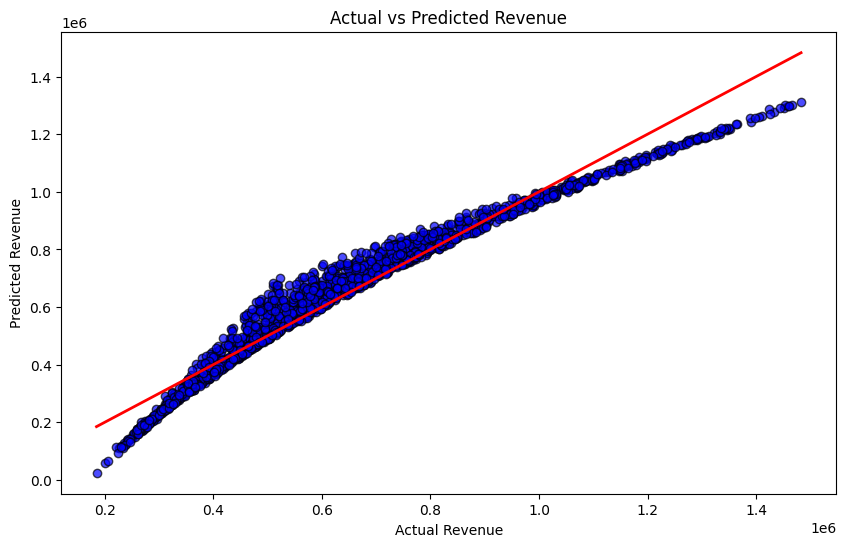

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Prepare the data
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict the revenue on the test set
y_pred = model_lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f'R-squared: {r2_lr:.2f}')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

# **RANDOM FOREST**

R-squared: 1.00
MSE: 56137453.59
RMSE: 7492.49
MAPE: 0.01


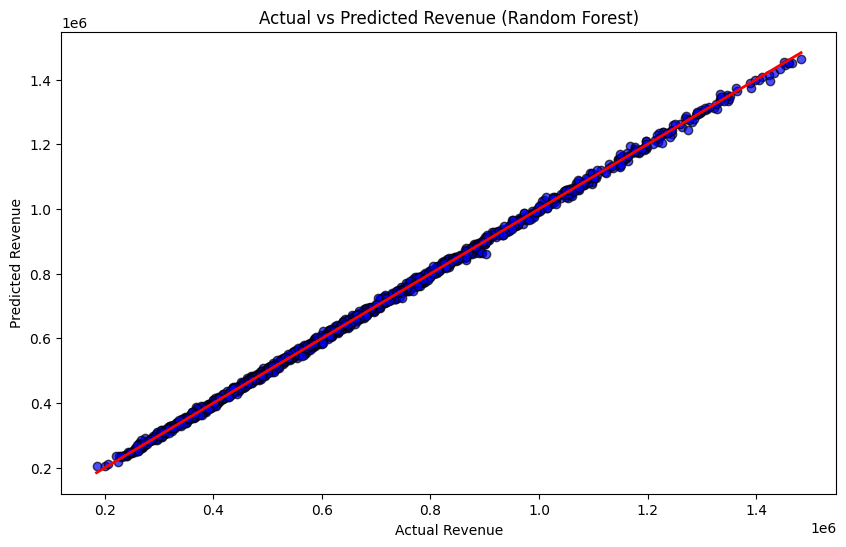

In [157]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict the revenue on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'R-squared: {r2_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (Random Forest)')
plt.show()


# **DECISION TREE**

R-squared: 1.00
MSE: 226436542.62
RMSE: 15047.81
MAPE: 0.02


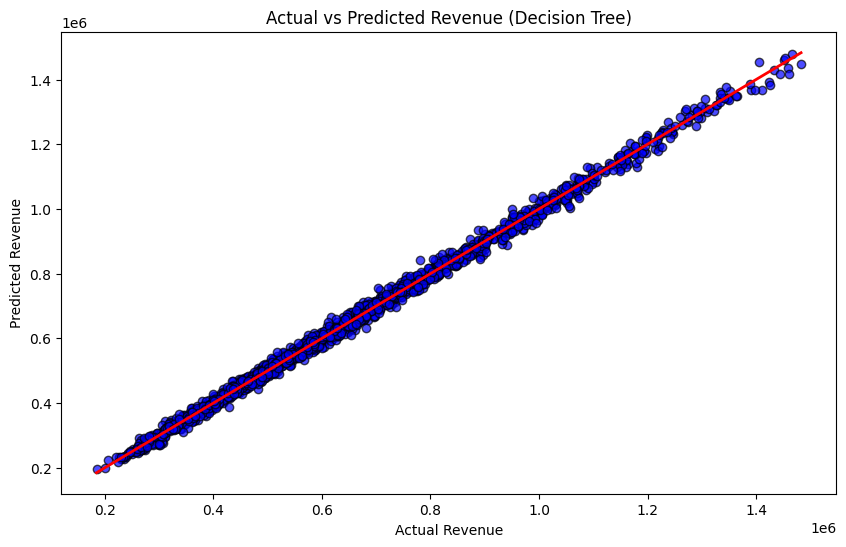

In [154]:
from sklearn.tree import DecisionTreeRegressor
# Create and train the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Predict the revenue on the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'R-squared: {r2_dt:.2f}')
print(f'MSE: {mse_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'MAPE: {mape_dt:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (Decision Tree)')
plt.show()

# **XGBOOST**

R-squared: 1.00
MSE: 62867370.55
RMSE: 7928.89
MAPE: 0.01


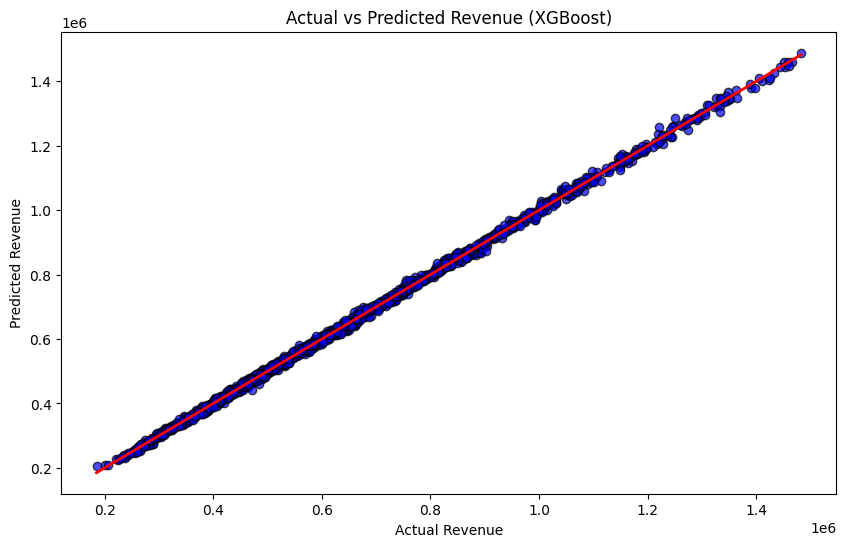

In [155]:
import xgboost as xgb

# Create and train the XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict the revenue on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'R-squared: {r2_xgb:.2f}')
print(f'MSE: {mse_xgb:.2f}')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'MAPE: {mape_xgb:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (XGBoost)')
plt.show()

Random Forest R-squared scores for each fold:
[0.99936877 0.9991516  0.99915551 0.99914059 0.99922579 0.9991676
 0.99906392 0.99926992 0.99918167 0.99910313]
Average R-squared for Random Forest: 1.00
XGBoost R-squared scores for each fold:
[0.99910947 0.99910309 0.99901625 0.99901455 0.99923395 0.99919234
 0.99910239 0.99904972 0.99914495 0.99907246]
Average R-squared for XGBoost: 1.00
Decision Tree R-squared scores for each fold:
[0.99714602 0.99697972 0.99678177 0.99648141 0.99696023 0.9968513
 0.9966294  0.99715697 0.99696623 0.99679177]
Average R-squared for Decision Tree: 1.00


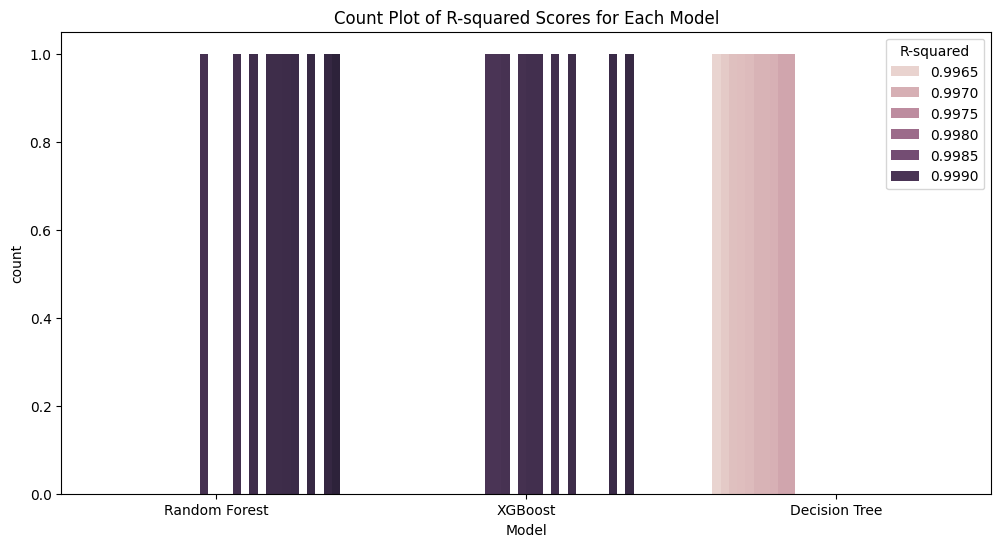

In [156]:
from sklearn.model_selection import cross_val_score ,  KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(model_rf, X, y, cv=kf, scoring='r2')

print("Random Forest R-squared scores for each fold:")
print(scores_rf)
print(f"Average R-squared for Random Forest: {np.mean(scores_rf):.2f}")

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
scores_xgb = cross_val_score(model_xgb, X, y, cv=kf, scoring='r2')

print("XGBoost R-squared scores for each fold:")
print(scores_xgb)
print(f"Average R-squared for XGBoost: {np.mean(scores_xgb):.2f}")

model_dt = DecisionTreeRegressor(random_state=42)
scores_dt = cross_val_score(model_dt, X, y, cv=kf, scoring='r2')

print("Decision Tree R-squared scores for each fold:")
print(scores_dt)
print(f"Average R-squared for Decision Tree: {np.mean(scores_dt):.2f}")

# Create a DataFrame for plotting
results = pd.DataFrame({
    'Random Forest': scores_rf,
    'XGBoost': scores_xgb,
    'Decision Tree': scores_dt
})

# Melt the DataFrame for easier plotting
results_melted = results.melt(var_name='Model', value_name='R-squared')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Model', hue='R-squared', data=results_melted)
plt.title('Count Plot of R-squared Scores for Each Model')
plt.show()


In [158]:
import joblib
joblib.dump(model_rf, 'rf_model.pkl')

['rf_model.pkl']

In [165]:
X.columns

Index(['Rating', 'Seating Capacity', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Weekend Reservations',
       'Weekday Reservations', 'Marketing Budget in Rupees',
       'Average Meal Price in Rupees', 'Location_Downtown', 'Location_Rural',
       'Location_Suburban', 'Cuisine_American', 'Cuisine_French',
       'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese',
       'Cuisine_Mexican', 'Parking Availability_No',
       'Parking Availability_Yes', 'Marketing Budget (Log)',
       'Social Media Followers (Log)'],
      dtype='object')

In [169]:
import joblib

# Load the Random Forest model
model = joblib.load('rf_model.pkl')

# Define preprocessing function
def preprocess_input(location, cuisine, rating, seating_capacity, followers, chef_experience, reviews, avg_review_length, ambience_score, service_quality_score, parking, weekend_reservations, weekday_reservations, Marketing_Budget_in_Rupees, Average_Meal_Price_in_Rupees):
    data = {
        'Location': [location],
        'Cuisine': [cuisine],
        'Rating': [rating],
        'Seating Capacity': [seating_capacity],
        'Social Media Followers': [followers],
        'Chef Experience Years': [chef_experience],
        'Number of Reviews': [reviews],
        'Avg Review Length': [avg_review_length],
        'Ambience Score': [ambience_score],
        'Service Quality Score': [service_quality_score],
        'Parking Availability': [parking],
        'Weekend Reservations': [weekend_reservations],
        'Weekday Reservations': [weekday_reservations],
        'Marketing Budget in Rupees': [Marketing_Budget_in_Rupees],
        'Average Meal Price in Rupees': [Average_Meal_Price_in_Rupees]
    }

    df = pd.DataFrame(data)

    # Encode categorical variables
    df = pd.get_dummies(df, columns=['Location', 'Cuisine', 'Parking Availability'])

    # Add log-transformed columns
    df['Marketing Budget (Log)'] = np.log1p(df['Marketing Budget in Rupees'])
    df['Social Media Followers (Log)'] = np.log1p(df['Social Media Followers'])

    # Define expected columns
    expected_cols = ['Rating', 'Seating Capacity', 'Social Media Followers', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Marketing Budget in Rupees', 'Average Meal Price in Rupees', 'Location_Downtown', 'Location_Rural', 'Location_Suburban', 'Cuisine_American', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_No', 'Parking Availability_Yes', 'Marketing Budget (Log)', 'Social Media Followers (Log)']

    # Add missing columns with default values
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0

    # Reorder columns
    df = df[expected_cols]

    return df

# Define prediction function
def predict_revenue(location, cuisine, rating, seating_capacity, followers, chef_experience, reviews, avg_review_length, ambience_score, service_quality_score, parking, weekend_reservations, weekday_reservations, Marketing_Budget_in_Rupees, Average_Meal_Price_in_Rupees):
    preprocessed_df = preprocess_input(location, cuisine, rating, seating_capacity, followers, chef_experience, reviews, avg_review_length, ambience_score, service_quality_score, parking, weekend_reservations, weekday_reservations, Marketing_Budget_in_Rupees, Average_Meal_Price_in_Rupees)
    prediction = model.predict(preprocessed_df)
    return prediction[0]

# Collect user input
location = input("Enter Location (Rural, Downtown, Suburban): ")
cuisine = input("Enter Cuisine (Japanese, Mexican, Italian, Indian, French, American): ")
rating = float(input("Enter Rating (3.0 to 5.0): "))
seating_capacity = int(input("Enter Seating Capacity (30 to 90): "))
followers = int(input("Enter Social Media Followers: "))
chef_experience = int(input("Enter Chef Experience Years (1 to 19): "))
reviews = int(input("Enter Number of Reviews (50 to 999): "))
avg_review_length = int(input("Enter Avg Review Length (51 to 297): "))
ambience_score = float(input("Enter Ambience Score (1.0 to 10.0): "))
service_quality_score = float(input("Enter Service Quality Score (1.0 to 10.0): "))
parking = input("Enter Parking Availability (Yes, No): ")
weekend_reservations = int(input("Enter Weekend Reservations: "))
weekday_reservations = int(input("Enter Weekday Reservations: "))
Marketing_Budget_in_Rupees = int(input("Enter Marketing Budget in Rupees: "))
Average_Meal_Price_in_Rupees = int(input("Enter Average Meal Price in Rupees: "))

# Predict the revenue
revenue = predict_revenue(location, cuisine, rating, seating_capacity, followers, chef_experience, reviews, avg_review_length, ambience_score, service_quality_score, parking, weekend_reservations, weekday_reservations, Marketing_Budget_in_Rupees, Average_Meal_Price_in_Rupees)
print(f"Predicted Restaurant Revenue: Rs {revenue:.2f}")


Enter Location (Rural, Downtown, Suburban): Rural
Enter Cuisine (Japanese, Mexican, Italian, Indian, French, American): Japanese
Enter Rating (3.0 to 5.0): 3.5
Enter Seating Capacity (30 to 90): 89
Enter Social Media Followers: 234556
Enter Chef Experience Years (1 to 19): 13
Enter Number of Reviews (50 to 999): 876
Enter Avg Review Length (51 to 297): 58
Enter Ambience Score (1.0 to 10.0): 2.5
Enter Service Quality Score (1.0 to 10.0): 4.5
Enter Parking Availability (Yes, No): Yes
Enter Weekend Reservations: 34
Enter Weekday Reservations: 34
Enter Marketing Budget in Rupees: 234567
Enter Average Meal Price in Rupees: 23456
Predicted Restaurant Revenue: Rs 1507177.92
